# Test of model - from url

## Importing librairies

In [13]:
import os
from keras.models import load_model
import keras
import tensorflow as tf 
import imageio
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
os.chdir("../Week 9/Final Project/Output")

In [16]:
model = tf.keras.models.load_model('final_model.h5')

In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
genre=['Impressionism', 'Renaissance', 'Post-Impressionism', 'Symbolism', 'Baroque']

def transform_url(url):
    # Predict from web 
    web_image = imageio.imread(url)
    web_image = cv2.resize(web_image, dsize=(100,100) )
    #web_image = image.img_to_array(web_image)
    web_image = web_image/255.0
    web_image = np.expand_dims(web_image, axis=0)
    return web_image

def predict_url(web_image):
    prediction = probability_model.predict(web_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)

    print("Predicted genre =", genre[prediction_idx])
    print("Prediction probability =", round(((prediction_probability)*100),2), "%")

    pred=plt.imshow(imageio.imread(url))
    plt.axis('off')
    plt.show()
    return pred

In [19]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12800)            

In [60]:
np.amax(model.predict(web_image))

1.4356645

In [59]:
probability_model.predict(web_image)

array([[0.5093679 , 0.13759136, 0.20918737, 0.08707986, 0.05677352]],
      dtype=float32)

# Final project Ironhack 

## Testing the model

In [8]:
genre

['Impressionism', 'Renaissance', 'Post-Impressionism', 'Symbolism', 'Baroque']

please enter an image url to test the model !https://artgreet.com/wp-content/uploads/2018/04/The_Scream-Munch.jpg
Predicted genre = Symbolism
Prediction probability = 91.62 %


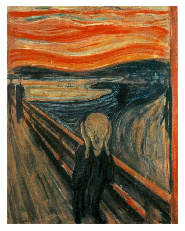

In [25]:
url=input("please enter an image url to test the model !")
web_image=transform_url(url)
test_prediction=predict_url(web_image)

Examples of url
* https://3.bp.blogspot.com/-JYgEVcB8kHo/XI-w1i6QdVI/AAAAAAAGVvA/1ssGxibWfTkKQQq0PSA0769zO0nqp_YoACLcBGAs/s1600/Johannes-Vermeer-Girl-with-a-Pearl-Earring-1665.jpg
* https://d2jv9003bew7ag.cloudfront.net/uploads/Vincent-van-Gogh-Starry_Night_Over_the_Rhone.-Image-via-wikimedia.org_-865x577.jpg